Wczytaj kilka dowolnych obrazów (zarówno fotografii jak i rysunków o niewielkiej liczbie kolorów).
Użyj algorytmu KMeans do zredukowania liczby kolorów wczytanych obrazów. Pokaż i omów wyniki.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

In [19]:
def reduce_colors(path, n_colors):
    image = imread(path)
    w, h, d = image.shape

    pixels = image.reshape(-1, 3).astype(float)
    pixels /= 255.0  #normalizacja pikseli do [0, 1]

    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(pixels)
    
    centers = kmeans.cluster_centers_
    quantized_pixels = centers[labels].reshape(w, h, 3)

    return quantized_pixels

In [20]:
def show_original_and_quantized(img, quantized_img, title="", k=None):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Oryginał")

    plt.subplot(1, 2, 2)
    plt.imshow(quantized_img)
    plt.axis("off")
    if k is not None:
        plt.title(f"KMeans, k={k}")
    else:
        plt.title("KMeans")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


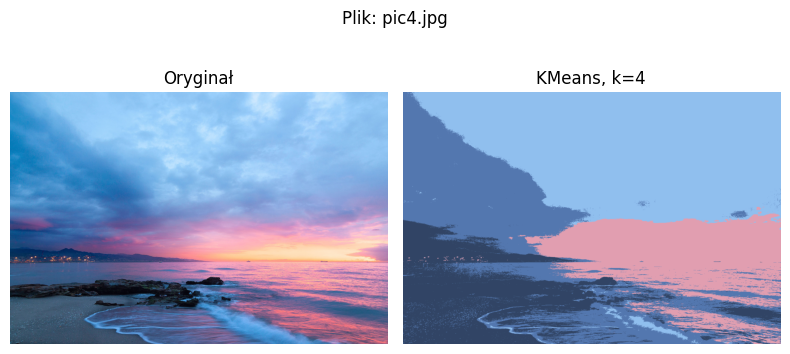

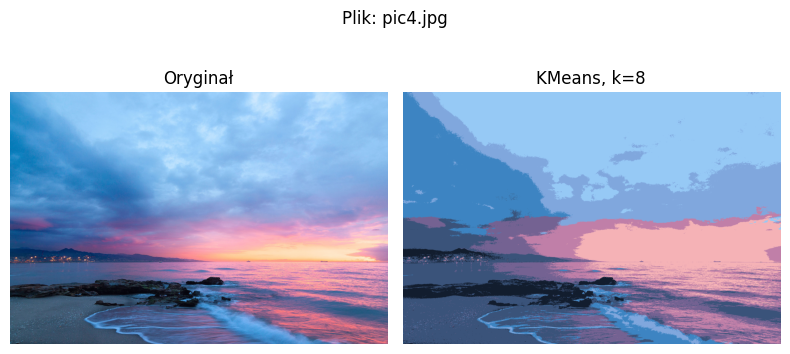

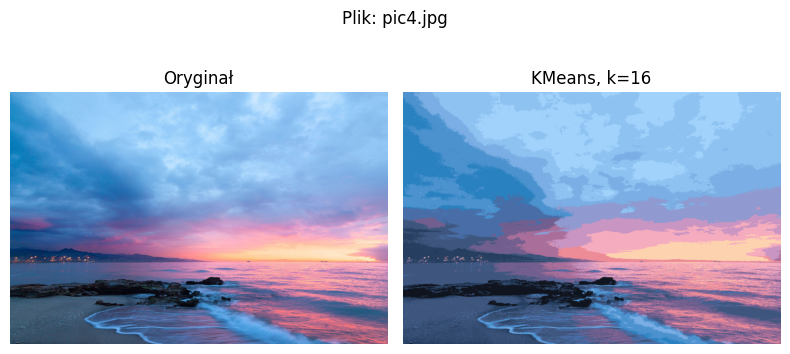

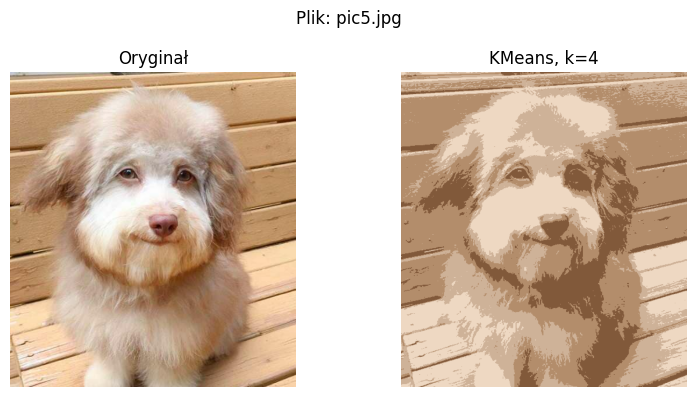

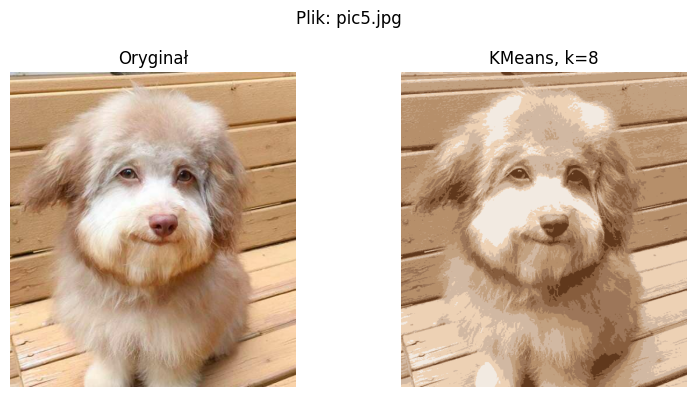

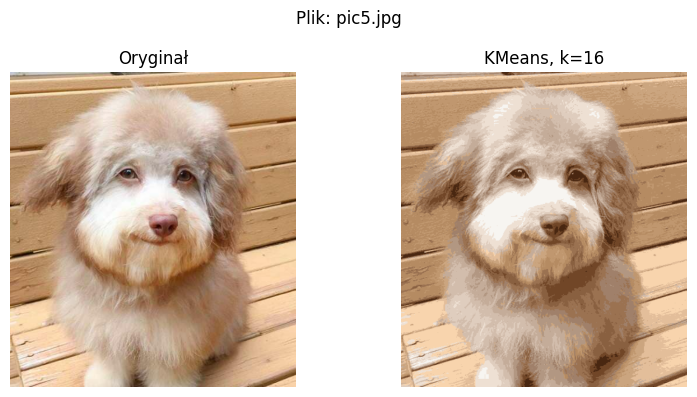

In [21]:
file_paths = [
    "pic4.jpg",
    "pic5.jpg",
]

k_values = [4, 8, 16]

for path in file_paths:
    img = imread(path)

    for k in k_values:
        quantized_img = reduce_colors(path, n_colors=k)
        show_original_and_quantized(
            img, quantized_img,
            title=f"Plik: {path}",
            k=k
        )